C:\Users\hmmar\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



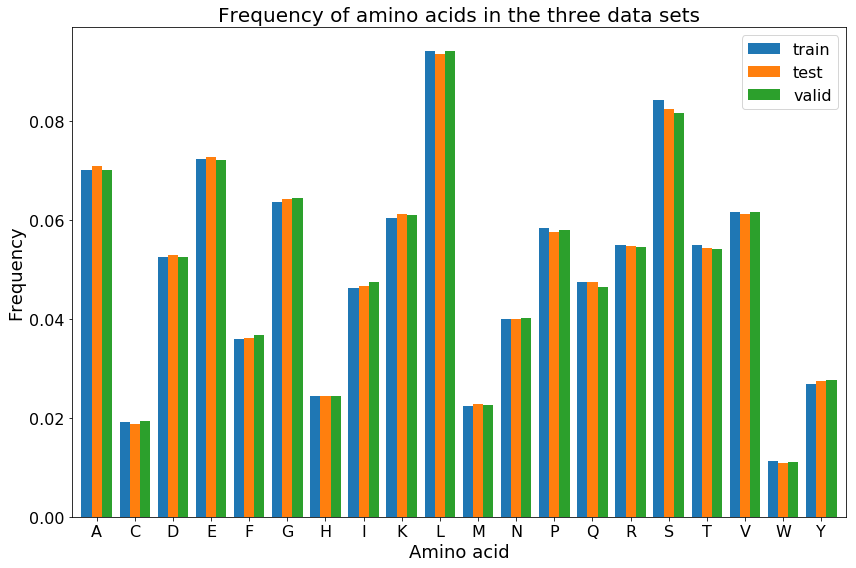

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os

train = {}
test = {}
valid = {}

with open('../data/proteins.train.txt', 'r') as f:
    for line in f.readlines():
        for word in line.split():
            train[word] = train.get(word, 0) + 1

N = sum(train.values())
train = {w: c/N for w, c in train.items()}

with open('../data/proteins.test.txt', 'r') as f:
    for line in f.readlines():
        for word in line.split():
            test[word] = test.get(word, 0) + 1
N = sum(test.values())
test = {w: c/N for w, c in test.items()}

with open('../data/proteins.val.txt', 'r') as f:
    for line in f.readlines():
        for word in line.split():
            valid[word] = valid.get(word, 0) + 1
N = sum(valid.values())
valid = {w: c/N for w, c in valid.items()}            

df = pd.concat([pd.Series(d) for d in [train, test, valid]], axis=1)
df.columns = ['train', 'test', 'valid']

df.plot(kind='bar', stacked=False, width=0.8, figsize=(12,8))
plt.xlabel('Amino acid', size=18)
plt.ylabel('Frequency', size=18)
plt.xticks(rotation='horizontal', size=16)
plt.yticks(size=16)
plt.legend(prop={'size': 16})
plt.title("Frequency of amino acids in the three data sets", fontsize=20)
plt.tight_layout()
plt.show()